# K-Means Clustering

## Objetivo

*   Aprender a usar o algoritmo do Kmeans do Scikit-learn


In [4]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

np.random.seed(0)

In [5]:
df = pd.read_excel("https://github.com/EduPekUfpr/PPGOLD7037/raw/main/Data/Cluster01.xlsx")

## K-Means

Nós Usaremos 3 parâmetros para o KMeans:

* init: k-means++ - Seleção automática nos centróides iniciais
* n_clusters: 5 Número de CLusters
* n_init: 30 quantas reinicializações com diferentes centróides

In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 1)

In [7]:
k_means.fit(df)

KMeans(n_clusters=5, n_init=1)

In [8]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 0, 0, 3, 0, 2, 1, 0, 2, 4, 2, 0, 2, 3, 1, 2, 3, 0, 2, 1, 3,
       4, 2, 0, 1, 0, 0, 3, 1, 0, 4, 0, 2, 4, 3, 3, 0, 0, 3, 4, 4, 2, 4,
       4, 1, 3, 4, 1, 1, 3, 3, 4, 3, 0, 1, 0, 1, 2, 1, 3, 3, 2, 4, 3, 3,
       3, 1, 1, 0, 3, 1, 0, 0, 3, 4, 3, 0, 4, 4, 2, 2, 3, 3, 4, 0, 1, 0,
       1, 1, 2, 4, 4, 2, 2, 3, 3, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 3, 4, 4,
       0, 1, 3, 4, 0, 3, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2, 4, 0, 2, 2, 2, 4,
       4, 1, 0, 2, 3, 1, 2, 4, 0, 2, 3, 1, 1, 2, 4, 2, 1, 4, 3, 2, 4, 4,
       1, 4, 2, 3, 2, 4, 4, 1, 2, 1, 4, 2, 2, 0, 1, 1, 4, 1, 1, 0, 1, 3,
       1, 4, 0, 2, 1, 4, 1, 2, 3, 2, 1, 3, 2, 1, 0, 4, 4, 0, 1, 1, 3, 3,
       3, 3, 0, 0, 2, 2, 4, 3, 1, 0, 0, 4, 1, 0, 1, 3, 3, 2, 1, 3, 1, 1,
       4, 1, 2, 0, 0, 1, 3, 1, 4, 0, 2, 3, 1, 4, 2, 4, 0, 0, 4, 0, 2, 0,
       3, 4, 0, 3, 2, 2, 1, 1, 2, 2, 4, 2, 4, 1, 1, 3, 2, 4, 4, 3, 4, 4,
       2, 2, 2, 2, 2, 1, 4, 4, 4, 3, 0, 4, 2, 3, 3, 0, 1, 3, 1, 0, 4, 4,
       0, 3, 0, 1, 4, 2, 3, 2, 4, 2, 4, 1, 1, 0, 4,

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[15.09519073,  7.03443609],
       [ 7.08126561,  7.9450636 ],
       [-0.11103439, -0.12129607],
       [ 4.89798584, 15.00230617],
       [ 7.08020015, -0.04544284]])

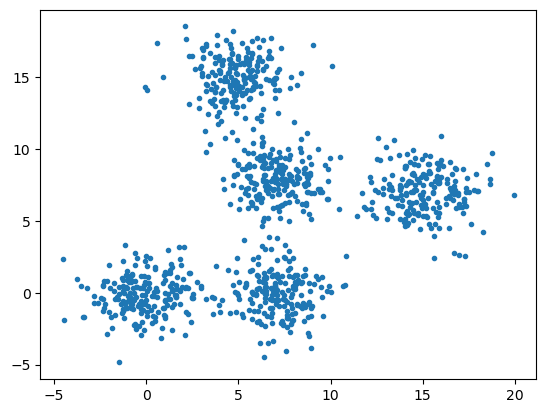

In [10]:
plt.scatter(df["X"], df["Y"], marker='.')

In [11]:
df_cluster = df.copy()
df_cluster["cluster"] = k_means_labels
UniqueLabels = df_cluster["cluster"].unique()

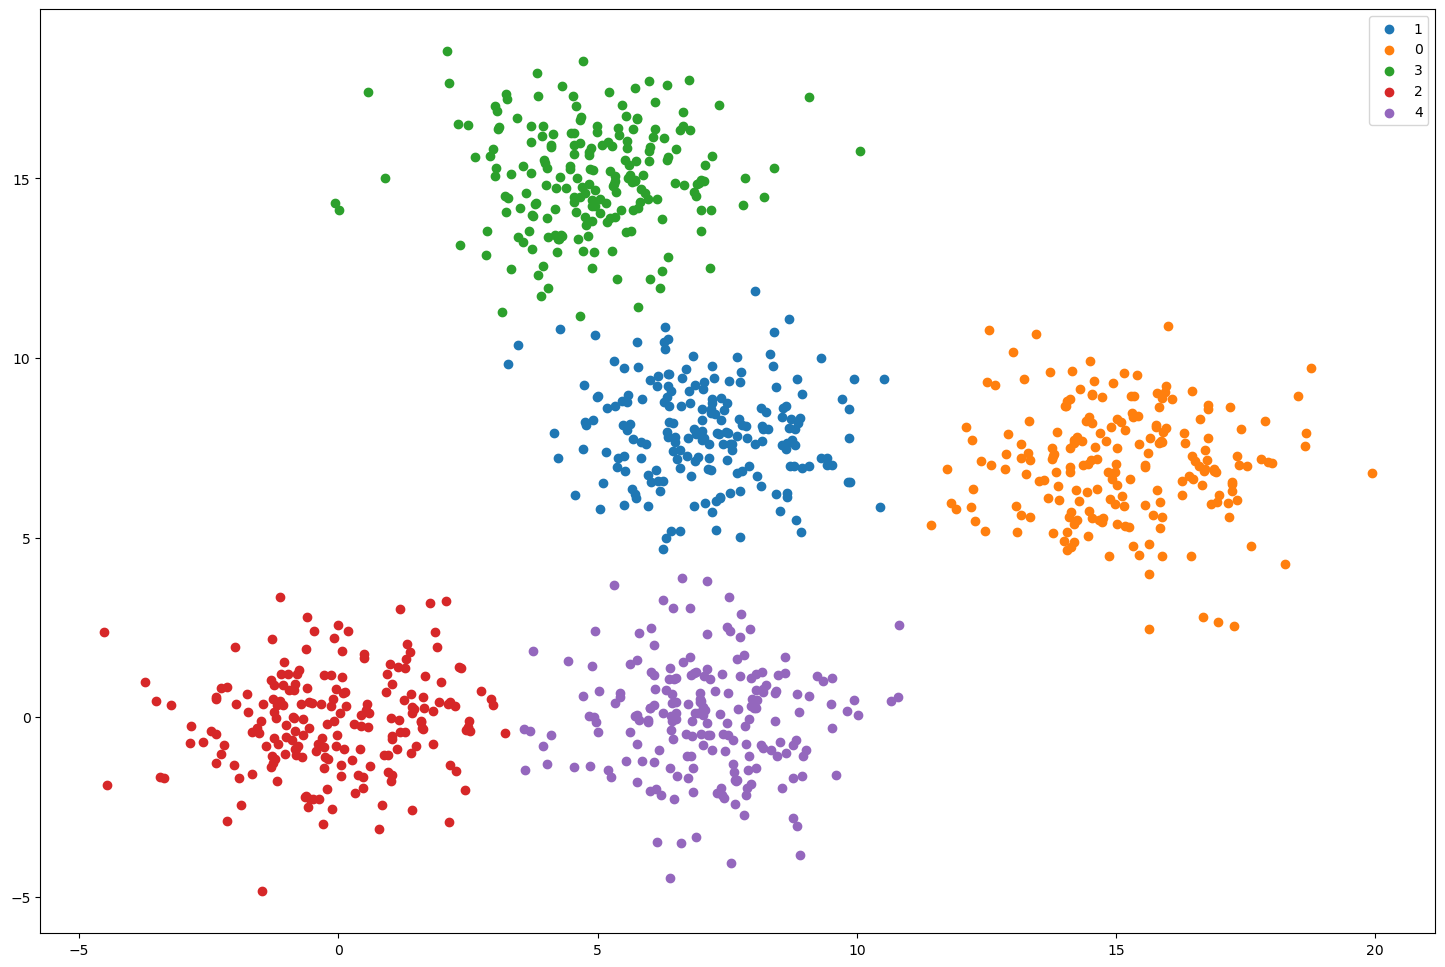

In [12]:
plt.figure(figsize=(18, 12))
for i in UniqueLabels:
    plt.scatter(df.loc[df_cluster['cluster'] == i, ['X']] , df.loc[df_cluster['cluster'] == i, ['Y']] , label = i)

plt.legend()
plt.show()

# Mas quantos clusters devemos usar?

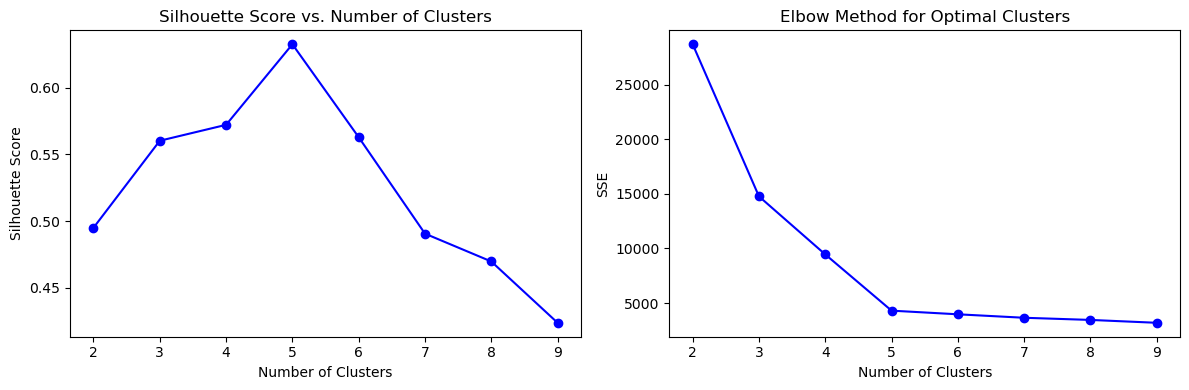

In [13]:
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Initialize an empty list to store SSE (Sum of Squared Errors) for the elbow method
sse = []

# Define a range of possible cluster numbers to try
cluster_range = range(2, 10)

# Iterate through the range of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 'auto')
    kmeans.fit(df[["X","Y"]])
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df[["X","Y"]], kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate SSE for elbow method
    sse.append(kmeans.inertia_)

# Plot silhouette scores
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, 'bo-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot SSE for elbow method
plt.subplot(1, 2, 2)
plt.plot(cluster_range, sse, 'bo-')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.tight_layout()
plt.show()

# Silouete Answer

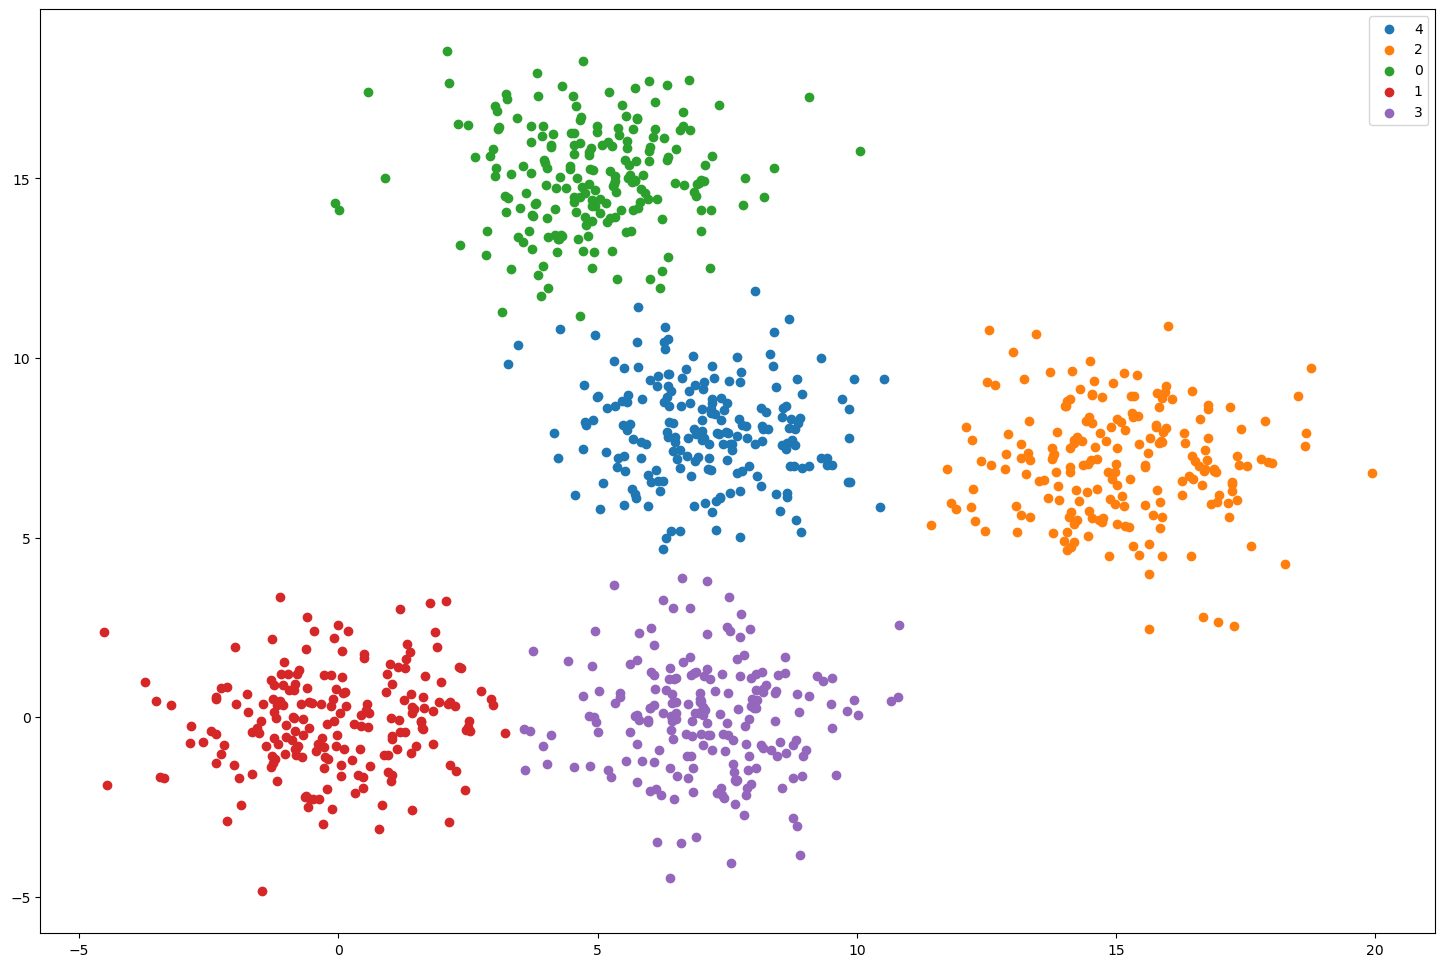

In [14]:
silouete_number = cluster_range[np.argmax(silhouette_scores)]

k_means = KMeans(init = "k-means++", n_clusters = silouete_number, n_init = 1)
k_means.fit(df)
k_means_labels = k_means.labels_
df_cluster = df.copy()
df_cluster["cluster"] = k_means_labels
UniqueLabels = df_cluster["cluster"].unique()

plt.figure(figsize=(18, 12))
for i in UniqueLabels:
    plt.scatter(df.loc[df_cluster['cluster'] == i, ['X']] , df.loc[df_cluster['cluster'] == i, ['Y']] , label = i)

plt.legend()
plt.show()

# Elbow

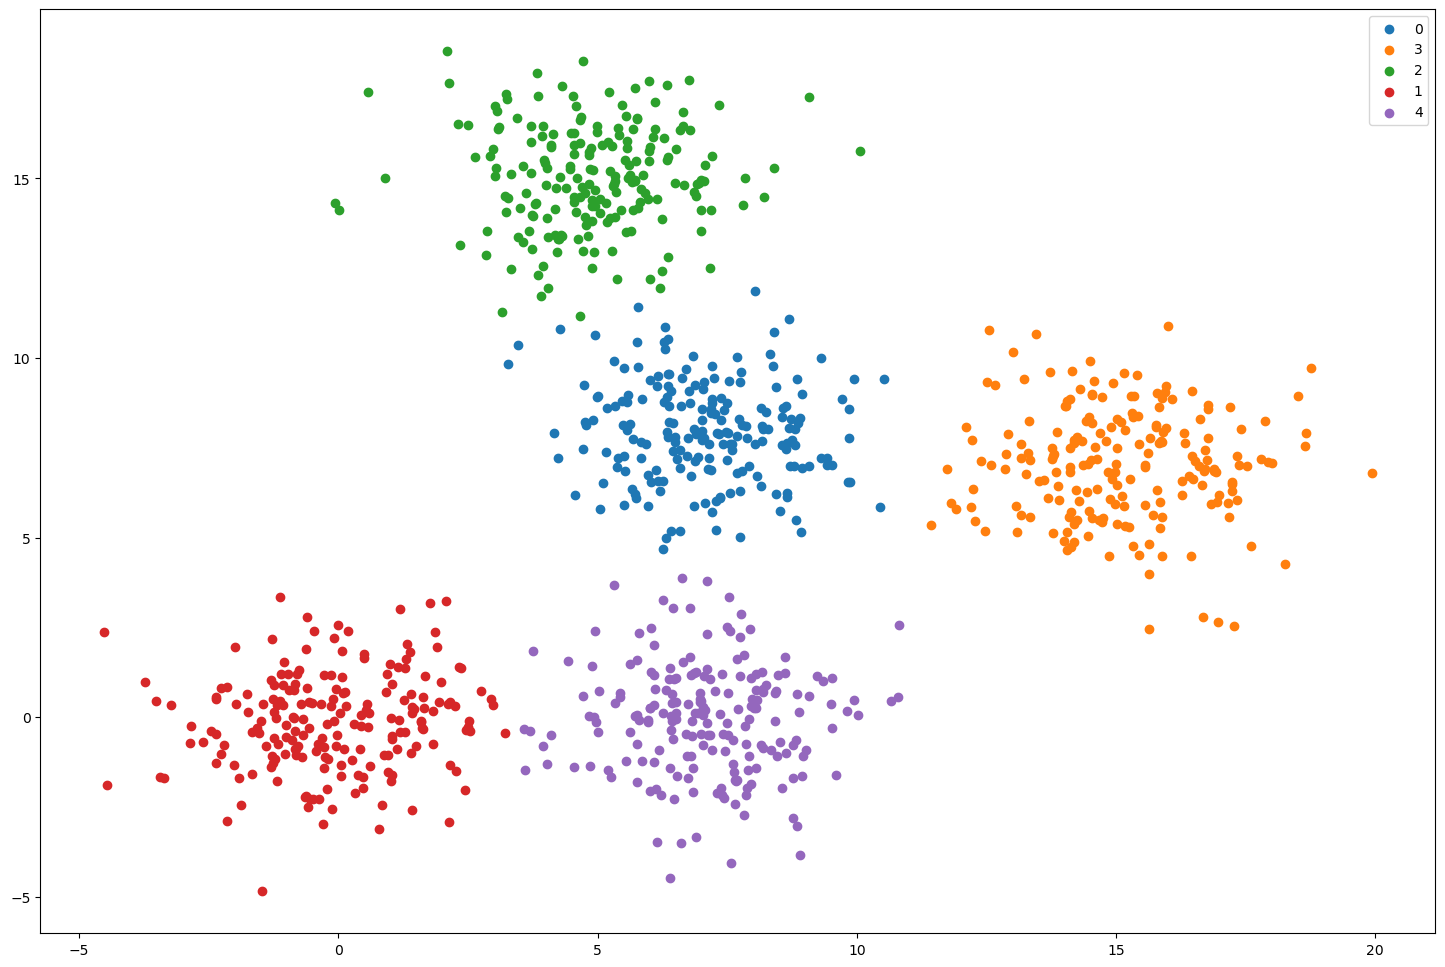

In [15]:
elbow_number = 5

k_means = KMeans(init = "k-means++", n_clusters = elbow_number, n_init = 1)
k_means.fit(df)
k_means_labels = k_means.labels_
df_cluster = df.copy()
df_cluster["cluster"] = k_means_labels
UniqueLabels = df_cluster["cluster"].unique()

plt.figure(figsize=(18, 12))
for i in UniqueLabels:
    plt.scatter(df.loc[df_cluster['cluster'] == i, ['X']] , df.loc[df_cluster['cluster'] == i, ['Y']] , label = i)

plt.legend()
plt.show()